In [1]:
# Magics
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
import logging

import elfi
import pylfire
import graphviz

import numpy as np
import matplotlib.pyplot as plt

from pylfire.models import arch

 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning:sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning:The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).


In [3]:
# Get logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

ELFI model:

In [4]:
m = arch.get_model()

INFO:pylfire.models.arch:true_params were not given. Now using [t1, t2] = [0.3, 0.7].


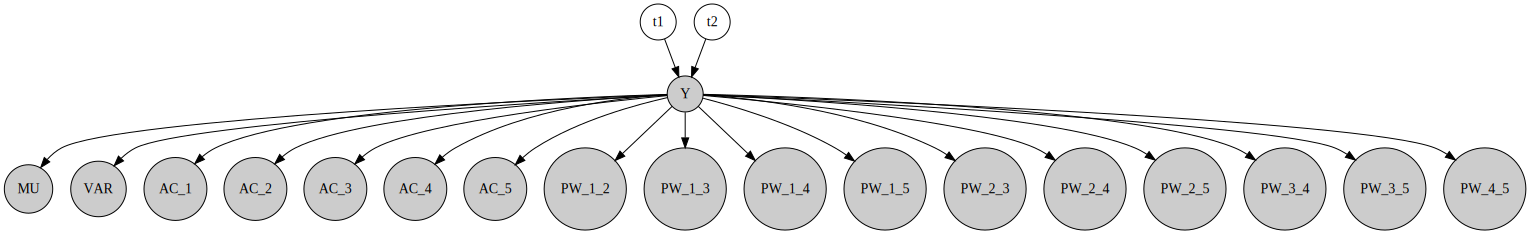

In [5]:
elfi.draw(m)

Create parameter grid:

In [6]:
n = 25

t1 = np.linspace(-1, 1, n)
t2 = np.linspace(0, 1, n)

tt1, tt2 = np.meshgrid(t1, t2, indexing='ij')

params_grid = np.c_[tt1.flatten(), tt2.flatten()]

LFIRE:

In [7]:
from pylfire.methods.lfire import LFIRE

In [8]:
from pylfire.classifiers.classifier import GPClassifier

In [9]:
cls=GPClassifier()

In [10]:
# LFIRE method
lfire_method = LFIRE(
    model=m,
    params_grid=params_grid,
    batch_size=100,
    classifier=cls
)

INFO:pylfire.methods.lfire:New marginal data (100 x 17) are generated.


In [11]:
# Run inference
%time lfire_res = lfire_method.infer()

 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:overflow encountered in multiply
 /Users/umvremes/anaconda/envs/bonfire_new/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:overflow encountered in add


Progress: |██████████████████████████████████████████████████| 100.0% Complete
CPU times: user 18min 15s, sys: 2min 26s, total: 20min 41s
Wall time: 7min 5s


LFIRE results:

In [12]:
lfire_res.summary()

Method: LFIRE
Number of simulations: 62500
MAP estimates: t1: 0.333, t2: 0.667
Posterior means: t1: 0.303, t2: 0.692



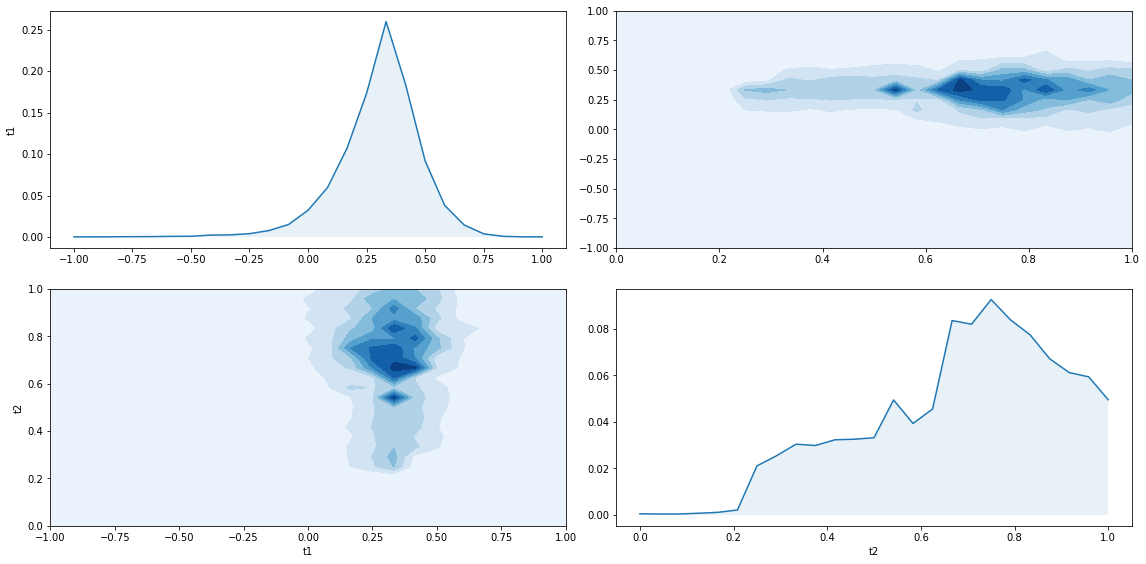

In [13]:
lfire_res.plot_pairs();